# Initialization

In [1]:
# Importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the dataset
df = pd.read_csv('insurance.txt')
df.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


## Function to normalize dataset
### normalize_dataset function normalizes the dataset by using the formula
## $X_{normalized} = \frac {X - min(X_i)} {max(X_i) - min(X_i)}$

In [3]:
def normalize_dataset(dataset):

    # normalize_coeff stores max and min of every column in dataset for denormalization
    normalize_coeff = {col: {'max': dataset[col].max(), 'min': dataset[col].min()} for col in dataset.columns}

    # normal_df is the normalized dataframe
    normal_df = (dataset - dataset.min()) / (dataset.max() - dataset.min())

    return pd.DataFrame(normal_df), normalize_coeff

In [4]:
normal_df, normalize_coeff = normalize_dataset(df)

# Inserting bias column in dataframe
normal_df.insert(0, 'bias', [1] * len(normal_df))

normal_df.head()

,bias,age,bmi,children,charges
0,1,0.021739,0.321227,0.0,0.251611
1,1,0.000000,0.479150,0.2,0.009636
2,1,0.217391,0.458434,0.6,0.053115
3,1,0.326087,0.181464,0.0,0.333010
4,1,0.304348,0.347592,0.0,0.043816


## Function to shuffle the dataset and return $X_{train}, Y_{train}, X_{test}, Y_{test}$ matrices 

In [5]:
from math import ceil
def shuffle(dataframe, ratio, target):
    
    # Getting list of columns for X matrix
    columns = list(dataframe.columns)
    columns.remove(target)
    
    # Getting the max index for training set
    train_len = ceil(len(dataframe) * ratio)
    
    # Shuffling the dataset
    sf = dataframe.sample(frac = 1)
    
    # Dividing X and Y matrices
    X = sf[columns]
    Y = sf[target]
    
    # Generating train, validation and test sets
    X_train = X.iloc[:train_len].to_numpy().reshape((-1, len(columns)))
    X_test = X.iloc[train_len:].to_numpy().reshape((-1, len(columns)))
    
    Y_train = Y.iloc[:train_len].to_numpy().reshape((-1, 1))
    Y_test = Y.iloc[train_len:].to_numpy().reshape((-1, 1))
    
    return X_train, Y_train, X_test, Y_test

## Function to initialize weights

In [6]:
def initialize_weights(X):
    num_features = X.shape[1]
    W = np.zeros((num_features, 1))
    return W

## Function to predict the results

In [7]:
def predict(W, X):
    predictions = X @ W         # '@' performs matrix multiplication
    return predictions

## Function to normalize a value

In [8]:
def normalize(value, name):
    nc = normalize_coeff[name]
    out = (value - nc['min']) / (nc['max'] - nc['min'])
    return out

## Function to denormalize a value

In [9]:
def denormalize(value, name):
    nc = normalize_coeff[name]
    out = value * (nc['max'] - nc['min']) + nc['min']
    return out

## Functions to calculate Error and Accuracy
### Metric used for error -> MSE
## $ MSE = \frac {\sum_{i=1}^{m}{(y_i - \hat y_i)^2}} {2m} $

In [10]:
def calculate_error(y, y_hat):
    y = y.flatten()
    y_hat = y_hat.flatten()
    sq_err = np.sum((y - y_hat) ** 2)
    mse = sq_err / (2 * len(y))
    return mse

### Metric used for accuracy -> $ R^2 $
## $ R^2 = 1- \frac {2 \times MSE} {Var(Y)} $

In [11]:
def calculate_accuracy(y, y_hat):
    y = y.flatten()
    y_hat = y_hat.flatten()
    mse = calculate_error(y, y_hat)
    var_y = np.var(y)
    rMSE = 2 * mse / var_y
    R2 = 1 - rMSE
    return R2

# Building Normal Equation Model
## Function to generate weight matrix W using normal equation
### $ W = (X^TX)^{-1}X^TY $

In [12]:
def get_weight_by_equations(X, Y):
    W = np.linalg.inv(X.T @ X) @ X.T @ Y    # '@' performs matrix multiplication
    return W

## Generating the model 20 times with different train-test split

In [13]:
W_normal = {}
train_accuracy_normal = {}
test_accuracy_normal = {}
train_cost_normal = {}
test_cost_normal = {}

for i in range(1, 21):
    X_train, Y_train, X_test, Y_test = shuffle(normal_df, ratio = 0.7, target = 'charges')
    W_normal[i] = get_weight_by_equations(X_train, Y_train)
    train_predictions = predict(W_normal[i], X_train)
    test_predictions = predict(W_normal[i], X_test)
    train_accuracy_normal[i] = calculate_accuracy(Y_train, train_predictions)
    test_accuracy_normal[i] = calculate_accuracy(Y_test, test_predictions)
    train_cost_normal[i] = calculate_error(Y_train, train_predictions)
    test_cost_normal[i] = calculate_error(Y_test, test_predictions)

## Analyzing the models
### Analyzing costs

In [14]:
train_mean_cost_normal = np.mean(list(train_cost_normal.values()))
train_var_cost_normal = np.var(list(train_cost_normal.values()))
train_max_cost_normal = np.max(list(train_cost_normal.values()))
train_min_cost_normal = np.min(list(train_cost_normal.values()))

test_mean_cost_normal = np.mean(list(test_cost_normal.values()))
test_var_cost_normal = np.var(list(test_cost_normal.values()))
test_max_cost_normal = np.max(list(test_cost_normal.values()))
test_min_cost_normal = np.min(list(test_cost_normal.values()))

print(f'Mean train cost = {train_mean_cost_normal}')
print(f'Variance train cost = {train_var_cost_normal}')
print(f'Max train cost = {train_max_cost_normal}')
print(f'Min train cost = {train_min_cost_normal}')
print()
print(f'Mean test cost = {test_mean_cost_normal}')
print(f'Variance test cost = {test_var_cost_normal}')
print(f'Max test cost = {test_max_cost_normal}')
print(f'Min test cost = {test_min_cost_normal}')

Mean train cost = 0.01634005734228945
Variance train cost = 4.0407091364746904e-07
Max train cost = 0.017256870694446542
Min train cost = 0.014338387224182115

Mean test cost = 0.01670334433611818
Variance test cost = 2.3349242896348823e-06
Max test cost = 0.021566624152852685
Min test cost = 0.014511702210177774


### Analyzing accuracies

In [15]:
train_mean_accuracy_normal = np.mean(list(train_accuracy_normal.values()))
train_var_accuracy_normal = np.var(list(train_accuracy_normal.values()))
train_max_accuracy_normal = np.max(list(train_accuracy_normal.values()))
train_min_accuracy_normal = np.min(list(train_accuracy_normal.values()))

test_mean_accuracy_normal = np.mean(list(test_accuracy_normal.values()))
test_var_accuracy_normal = np.var(list(test_accuracy_normal.values()))
test_max_accuracy_normal = np.max(list(test_accuracy_normal.values()))
test_min_accuracy_normal = np.min(list(test_accuracy_normal.values()))

print(f'Mean train accuracy = {train_mean_accuracy_normal}')
print(f'Variance train accuracy = {train_var_accuracy_normal}')
print(f'Max train accuracy = {train_max_accuracy_normal}')
print(f'Min train accuracy = {train_min_accuracy_normal}')
print()
print(f'Mean test accuracy = {test_mean_accuracy_normal}')
print(f'Variance test accuracy = {test_var_accuracy_normal}')
print(f'Max test accuracy = {test_max_accuracy_normal}')
print(f'Min test accuracy = {test_min_accuracy_normal}')

Mean train accuracy = 0.1222715278049209
Variance train accuracy = 8.275253066851866e-05
Max train accuracy = 0.1385203919730632
Min train accuracy = 0.09887802014371716

Mean test accuracy = 0.10711234688600506
Variance test accuracy = 0.0004478628765389802
Max test accuracy = 0.14291169804168025
Min test accuracy = 0.06244514632286413


### Finding best model

In [16]:
best_normal_model = np.argmin(list(test_cost_normal.values())) + 1
print(f'Best Normal Model is {best_normal_model}')

Best Normal Model is 19


## Visualizing the results
### Cost vs model number plot

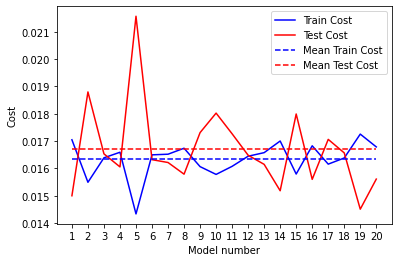

In [17]:
plt.figure()
plt.plot(list(train_cost_normal.keys()), list(train_cost_normal.values()), 'b-', label = 'Train Cost')
plt.plot(list(test_cost_normal.keys()), list(test_cost_normal.values()), 'r-', label = 'Test Cost')
plt.plot(list(train_cost_normal.keys()), [train_mean_cost_normal] * len(train_cost_normal), 'b--', label = 'Mean Train Cost')
plt.plot(list(test_cost_normal.keys()), [test_mean_cost_normal] * len(test_cost_normal), 'r--', label = 'Mean Test Cost')
plt.xlabel('Model number')
plt.ylabel('Cost')
plt.legend()
plt.xticks(list(train_cost_normal.keys()));

### Accuracy vs model number plot

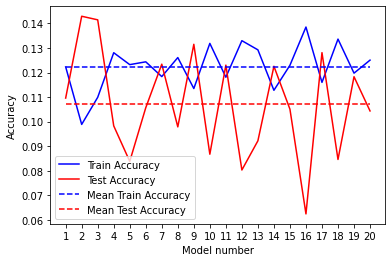

In [18]:
plt.figure()
plt.plot(list(train_accuracy_normal.keys()), list(train_accuracy_normal.values()), 'b-', label = 'Train Accuracy')
plt.plot(list(test_accuracy_normal.keys()), list(test_accuracy_normal.values()), 'r-', label = 'Test Accuracy')
plt.plot(list(train_accuracy_normal.keys()), [train_mean_accuracy_normal] * len(train_accuracy_normal), 'b--', label = 'Mean Train Accuracy')
plt.plot(list(test_accuracy_normal.keys()), [test_mean_accuracy_normal] * len(test_accuracy_normal), 'r--', label = 'Mean Test Accuracy')
plt.xlabel('Model number')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(list(train_accuracy_normal.keys()));

# Building Gradient Descent model
## Function for finding W using Gradient Descent

In [19]:
def gradient_descent(X, y, W, eta = 0.1, num_iterations = 1000, epsilon = 1e-10):
    print_space = num_iterations // 5 if num_iterations > 5 else 1
    m = len(X)
    J = {}
    accuracy = {}
    for i in range(1, num_iterations + 1):
        dW = (1 / m) * (X.T @ (X @ W - y))
        W = W - (eta * dW)
        prediction = predict(W, X)
        cost = calculate_error(y, prediction)
        J[i] = cost
        acc = calculate_accuracy(y, prediction)
        accuracy[i] = acc
        if i == 1 or i % print_space == 0:
            print(f'Cost after {i} iterations is {cost}, accuracy = {acc}')
        if i != 1 and J[i-1] - J[i] < epsilon:
            break
    return W, J, accuracy

## Function for analyzing models

In [20]:
def analyze_cost_accuracy(train_cost_dict, test_cost_dict, train_acc_dict, test_acc_dict):
    
    train_costs = [list(x.values())[-1] for x in list(train_cost_dict.values())]
    test_costs = list(test_cost_dict.values())
    
    train_accuracies = [list(x.values())[-1] for x in list(train_acc_dict.values())]
    test_accuracies = list(test_acc_dict.values())

    train_mean_cost = np.mean(train_costs)
    train_var_cost = np.var(train_costs)
    train_max_cost = np.max(train_costs)
    train_min_cost = np.min(train_costs)

    test_mean_cost = np.mean(test_costs)
    test_var_cost = np.var(test_costs)
    test_max_cost = np.max(test_costs)
    test_min_cost = np.min(test_costs)
    
    train_mean_accuracy = np.mean(train_accuracies)
    train_var_accuracy = np.var(train_accuracies)
    train_max_accuracy = np.max(train_accuracies)
    train_min_accuracy = np.min(train_accuracies)

    test_mean_accuracy = np.mean(test_accuracies)
    test_var_accuracy = np.var(test_accuracies)
    test_max_accuracy = np.max(test_accuracies)
    test_min_accuracy = np.min(test_accuracies)
    
    best_model_number = np.argmin(test_costs) + 1

    print(f'Mean train cost = {train_mean_cost}')
    print(f'Variance train cost = {train_var_cost}')
    print(f'Max train cost = {train_max_cost}')
    print(f'Min train cost = {train_min_cost}')
    print()
    print(f'Mean test cost = {test_mean_cost}')
    print(f'Variance test cost = {test_var_cost}')
    print(f'Max test cost = {test_max_cost}')
    print(f'Min test cost = {test_min_cost}')
    print()
    print(f'Mean train accuracy = {train_mean_accuracy}')
    print(f'Variance train accuracy = {train_var_accuracy}')
    print(f'Max train accuracy = {train_max_accuracy}')
    print(f'Min train accuracy = {train_min_accuracy}')
    print()
    print(f'Mean test accuracy = {test_mean_accuracy}')
    print(f'Variance test accuracy = {test_var_accuracy}')
    print(f'Max test accuracy = {test_max_accuracy}')
    print(f'Min test accuracy = {test_min_accuracy}')
    print()
    print(f'Best model number is {best_model_number}')
    
    return best_model_number

## Function for generating and analyzing 20 models with different train-test split

In [21]:
def generate_gd_models(eta, num_iterations = 1000):
    temp_W_gd = {}
    temp_train_cost_gd = {}
    temp_train_accuracy_gd = {}
    temp_test_cost_gd = {}
    temp_test_accuracy_gd = {}

    for i in range(1, 21):
        print(f'Training model {i}')
        X_train, Y_train, X_test, Y_test = shuffle(normal_df, ratio = 0.7, target = 'charges')
        W_init = initialize_weights(X_train)
        temp_W_gd[i], temp_train_cost_gd[i], temp_train_accuracy_gd[i] = \
                                                                gradient_descent(X_train, Y_train, W_init, eta, num_iterations)
        predictions = predict(temp_W_gd[i], X_test)
        temp_test_cost_gd[i] = calculate_error(Y_test, predictions)
        temp_test_accuracy_gd[i] = calculate_accuracy(Y_test, predictions)
        print()
        print(f'Test Cost = {temp_test_cost_gd[i]}, test accuracy = {temp_test_accuracy_gd[i]}')
        print()
        
    best_model = analyze_cost_accuracy(temp_train_cost_gd, temp_test_cost_gd, temp_train_accuracy_gd, temp_test_accuracy_gd)
    
    return temp_W_gd[best_model], temp_train_cost_gd[best_model], temp_train_accuracy_gd[best_model], \
                                                                temp_test_cost_gd[best_model], temp_test_accuracy_gd[best_model]

## Applying Gradient Descent

In [22]:
# Initializing important variables
W_gd = {}
train_cost_gd = {}
train_accuracy_gd = {}
test_cost_gd = {}
test_accuracy_gd = {}

### Learning Rate = 0.001

In [23]:
eta = 0.001
W_gd[eta], train_cost_gd[eta], train_accuracy_gd[eta], test_cost_gd[eta], test_accuracy_gd[eta] = generate_gd_models(eta)

Training model 1
Cost after 1 iterations is 0.034576451023784344, accuracy = -1.0034816700676337
Cost after 200 iterations is 0.02649988727669647, accuracy = -0.5354970462757755
Cost after 400 iterations is 0.021909778516901842, accuracy = -0.2695299359572654
Cost after 600 iterations is 0.019314552355159845, accuracy = -0.1191533677793033
Cost after 800 iterations is 0.01784367301704525, accuracy = -0.03392542490087691
Cost after 1000 iterations is 0.017006592607672257, accuracy = 0.014577969950083425

Test Cost = 0.02257843958300536, test accuracy = -0.038382831371484905

Training model 2
Cost after 1 iterations is 0.038689632627126776, accuracy = -0.9788051935063762
Cost after 200 iterations is 0.02962978603684047, accuracy = -0.5154337353690404
Cost after 400 iterations is 0.02451342228708809, accuracy = -0.25375414648663663
Cost after 600 iterations is 0.021639098832092654, accuracy = -0.10674509537007792
Cost after 800 iterations is 0.020020484176331486, accuracy = -0.02396004755

Cost after 200 iterations is 0.029089340633386123, accuracy = -0.5249085142585987
Cost after 400 iterations is 0.024075579311108226, accuracy = -0.262079341705022
Cost after 600 iterations is 0.02124748948382058, accuracy = -0.11382647096894627
Cost after 800 iterations is 0.019648805265938672, accuracy = -0.03002095587724196
Cost after 1000 iterations is 0.01874173328774669, accuracy = 0.017529169098874697

Test Cost = 0.017415172257688884, test accuracy = 0.01693373632804407

Training model 17
Cost after 1 iterations is 0.036850912569394885, accuracy = -1.0200684075101978
Cost after 200 iterations is 0.028055577830258926, accuracy = -0.5379316949783799
Cost after 400 iterations is 0.023094858675734648, accuracy = -0.2659983466870883
Cost after 600 iterations is 0.020311464894042015, accuracy = -0.11342014842756143
Cost after 800 iterations is 0.018745978695921983, accuracy = -0.027604384563902684
Cost after 1000 iterations is 0.01786184201738885, accuracy = 0.02086162204753439

Test 

### Learning Rate = 0.01

In [24]:
eta = 0.01
W_gd[eta], train_cost_gd[eta], train_accuracy_gd[eta], test_cost_gd[eta], test_accuracy_gd[eta] = generate_gd_models(eta)

Training model 1
Cost after 1 iterations is 0.038029777112213226, accuracy = -0.9704291681162134
Cost after 200 iterations is 0.01759112634664027, accuracy = 0.08855452002357644
Cost after 400 iterations is 0.017352777036910665, accuracy = 0.10090406471603675
Cost after 600 iterations is 0.017217398198575515, accuracy = 0.10791842115084216
Cost after 800 iterations is 0.017113098855799935, accuracy = 0.11332246195323625
Cost after 1000 iterations is 0.017031954032155922, accuracy = 0.11752680232783341

Test Cost = 0.016021250972431195, test accuracy = 0.06659238194345996

Training model 2
Cost after 1 iterations is 0.03610392925864773, accuracy = -0.9474039297816477
Cost after 200 iterations is 0.017117066326220842, accuracy = 0.07672536162995747
Cost after 400 iterations is 0.01691686000200331, accuracy = 0.08752425777655837
Cost after 600 iterations is 0.016808229734320865, accuracy = 0.09338364800144239
Cost after 800 iterations is 0.0167238422311166, accuracy = 0.09793541172187137


Cost after 400 iterations is 0.017413924966985513, accuracy = 0.09005381413023039
Cost after 600 iterations is 0.01729440216961457, accuracy = 0.096299351181663
Cost after 800 iterations is 0.017204270829303533, accuracy = 0.10100906880700289
Cost after 1000 iterations is 0.017135753620114682, accuracy = 0.1045893629271416

Test Cost = 0.01586336201909422, test accuracy = 0.09729098549172

Training model 16
Cost after 1 iterations is 0.03700477087575727, accuracy = -0.9303632634521326
Cost after 200 iterations is 0.017649721096913495, accuracy = 0.07929782000141439
Cost after 400 iterations is 0.017427547734559515, accuracy = 0.0908875498296493
Cost after 600 iterations is 0.017301918508815652, accuracy = 0.09744103027156614
Cost after 800 iterations is 0.017203574482163312, accuracy = 0.10257117137869576
Cost after 1000 iterations is 0.017125678736596237, accuracy = 0.1066346227138425

Test Cost = 0.015823042665617775, test accuracy = 0.09481727816785146

Training model 17
Cost after 

### Learning Rate = 0.1

In [25]:
eta = 0.1
W_gd[eta], train_cost_gd[eta], train_accuracy_gd[eta], test_cost_gd[eta], test_accuracy_gd[eta] = generate_gd_models(eta)

Training model 1
Cost after 1 iterations is 0.03285394649406739, accuracy = -0.7167824799287696
Cost after 200 iterations is 0.01688911309650025, accuracy = 0.1174596491522586
Cost after 400 iterations is 0.016813123994672927, accuracy = 0.12143045852538004
Cost after 600 iterations is 0.016794923578115777, accuracy = 0.12238152101884214
Cost after 800 iterations is 0.016788459186017013, accuracy = 0.12271931773073952
Cost after 1000 iterations is 0.016785991658554888, accuracy = 0.12284825834116164

Test Cost = 0.015798208124388653, test accuracy = 0.09995631310546571

Training model 2
Cost after 1 iterations is 0.03246282100204332, accuracy = -0.7167923183504694
Cost after 200 iterations is 0.0168294467977861, accuracy = 0.10997676441278836
Cost after 400 iterations is 0.016723106039799047, accuracy = 0.11560058239300164
Cost after 600 iterations is 0.016691240934338828, accuracy = 0.11728576459802598
Cost after 800 iterations is 0.016679399911936014, accuracy = 0.11791197561959088
C

Cost after 800 iterations is 0.01606597069384007, accuracy = 0.12398682981136289
Cost after 1000 iterations is 0.016062756323969366, accuracy = 0.12416209655336397

Test Cost = 0.01740736621036759, test accuracy = 0.0999796987468804

Training model 16
Cost after 1 iterations is 0.03402915388289243, accuracy = -0.72635163006377
Cost after 200 iterations is 0.017626492466952852, accuracy = 0.10578076353732868
Cost after 400 iterations is 0.017502170710573358, accuracy = 0.11208779860251816
Cost after 600 iterations is 0.017459603721905175, accuracy = 0.11424728780190041
Cost after 800 iterations is 0.01744294386949274, accuracy = 0.11509246789270744
Cost after 1000 iterations is 0.017436313895325305, accuracy = 0.11542881674083394

Test Cost = 0.014148056789823804, test accuracy = 0.11995259151510285

Training model 17
Cost after 1 iterations is 0.03174475462470562, accuracy = -0.7031226110524258
Cost after 200 iterations is 0.016687063665931517, accuracy = 0.10473034750121657
Cost after

## Finding best learning rate

In [26]:
best_eta_gd = min(test_cost_gd, key = test_cost_gd.get)
print(f'Best eta for GD is {best_eta_gd}')

Best eta for GD is 0.01


## Visualizing the results
### Cost vs iterations plot

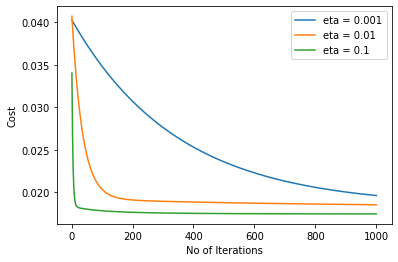

In [27]:
plt.figure()
for eta, error in train_cost_gd.items():
    plt.plot(list(error.keys()), list(error.values()), label = f'eta = {eta}')
plt.xlabel('No of Iterations')
plt.ylabel('Cost')
plt.legend();

### Accuracy vs iterations plot

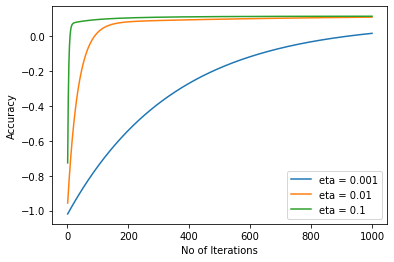

In [28]:
plt.figure()
for eta, accuracy in train_accuracy_gd.items():
    plt.plot(list(accuracy.keys()), list(accuracy.values()), label = f'eta = {eta}')
plt.xlabel('No of Iterations')
plt.ylabel('Accuracy')
plt.legend();

# Building Stochastic Gradient Descent model
## Function for finding W using Stochastic Gradient Descent

In [29]:
def stochastic_gradient_descent(X, Y, W, eta = 0.1, epochs = 1000):
    print_space = epochs // 5 if epochs > 5 else 1
    m = len(X)
    J = {}
    accuracy = {}
    for i in range(1, epochs + 1):
        for j in range(m):
            x = np.array(X[j]).reshape((1, len(W)))
            y = np.array(Y[j]).reshape((1, 1))
            dW = (1 / m) * x.T @ (x @ W - y)
            W = W - (eta * dW)
        prediction = predict(W, X)
        cost = calculate_error(Y, prediction)
        J[i] = cost
        acc = calculate_accuracy(Y, prediction)
        accuracy[i] = acc
        if i == 1 or i % print_space == 0:
            print(f'Cost after {i} epochs is {cost}, accuracy = {acc}')
    return W, J, accuracy

## Function for generating and analyzing 20 models with different train-test split

In [30]:
def generate_sgd_models(eta, epochs = 1000):
    temp_W_sgd = {}
    temp_train_cost_sgd = {}
    temp_train_accuracy_sgd = {}
    temp_test_cost_sgd = {}
    temp_test_accuracy_sgd = {}

    for i in range(1, 21):
        print(f'Training model {i}')
        X_train, Y_train, X_test, Y_test = shuffle(normal_df, ratio = 0.7, target = 'charges')
        W_init = initialize_weights(X_train)
        temp_W_sgd[i], temp_train_cost_sgd[i], temp_train_accuracy_sgd[i] = \
                                                            stochastic_gradient_descent(X_train, Y_train, W_init, eta, epochs)
        predictions = predict(temp_W_sgd[i], X_test)
        temp_test_cost_sgd[i] = calculate_error(Y_test, predictions)
        temp_test_accuracy_sgd[i] = calculate_accuracy(Y_test, predictions)
        print()
        print(f'Test Cost = {temp_test_cost_sgd[i]}, test accuracy = {temp_test_accuracy_sgd[i]}')
        print()
        
    best_model = analyze_cost_accuracy(temp_train_cost_sgd, temp_test_cost_sgd, temp_train_accuracy_sgd, temp_test_accuracy_sgd)
    
    return temp_W_sgd[best_model], temp_train_cost_sgd[best_model], temp_train_accuracy_sgd[best_model], \
                                                            temp_test_cost_sgd[best_model], temp_test_accuracy_sgd[best_model]

## Applying Stochastic Gradient Descent

In [31]:
# Initializing important variables
W_sgd = {}
train_cost_sgd = {}
train_accuracy_sgd = {}
test_cost_sgd = {}
test_accuracy_sgd = {}

### Learning Rate = 0.001

In [32]:
eta = 0.001
W_sgd[eta], train_cost_sgd[eta], train_accuracy_sgd[eta], test_cost_sgd[eta], test_accuracy_sgd[eta] = generate_sgd_models(eta)

Training model 1
Cost after 1 epochs is 0.03851645128075055, accuracy = -1.0033799660573273
Cost after 200 epochs is 0.029451128623741208, accuracy = -0.531859740465449
Cost after 400 epochs is 0.024319982983808226, accuracy = -0.2649702935889757
Cost after 600 epochs is 0.021430401684278746, accuracy = -0.11467271701383575
Cost after 800 epochs is 0.019798948083198133, accuracy = -0.02981491336694453
Cost after 1000 epochs is 0.018873769135483456, accuracy = 0.01830699057896512

Test Cost = 0.016824631807409757, test accuracy = 0.029500163553825787

Training model 2
Cost after 1 epochs is 0.03903328845154973, accuracy = -1.0325764785710434
Cost after 200 epochs is 0.029775814064804892, accuracy = -0.5505129518756804
Cost after 400 epochs is 0.024528993073402026, accuracy = -0.2772957734758714
Cost after 600 epochs is 0.021571424875241264, accuracy = -0.12328662405939084
Cost after 800 epochs is 0.019901008504104804, accuracy = -0.03630320144547672
Cost after 1000 epochs is 0.018954394

Cost after 1000 epochs is 0.018660736396446727, accuracy = 0.010755451072511746

Test Cost = 0.017475179343763324, test accuracy = 0.03918298518785779

Training model 16
Cost after 1 epochs is 0.0377884628836805, accuracy = -0.988416521265689
Cost after 200 epochs is 0.02900607329793224, accuracy = -0.5262900621332316
Cost after 400 epochs is 0.024018548699144562, accuracy = -0.2638481537927002
Cost after 600 epochs is 0.021200976048967365, accuracy = -0.11558840518307312
Cost after 800 epochs is 0.019605639758513458, accuracy = -0.03164233289434759
Cost after 1000 epochs is 0.018698835003927976, accuracy = 0.016073435834598193

Test Cost = 0.01758247447596533, test accuracy = 0.01686515381140008

Training model 17
Cost after 1 epochs is 0.03718715864220854, accuracy = -1.028183992870447
Cost after 200 epochs is 0.02834439130230545, accuracy = -0.5459003275862555
Cost after 400 epochs is 0.02334520314215293, accuracy = -0.27324509459783286
Cost after 600 epochs is 0.020534386899785532,

### Learning Rate = 0.01

In [33]:
eta = 0.01
W_sgd[eta], train_cost_sgd[eta], train_accuracy_sgd[eta], test_cost_sgd[eta], test_accuracy_sgd[eta] = generate_sgd_models(eta)

Training model 1
Cost after 1 epochs is 0.036377554512581387, accuracy = -0.9792260315195698
Cost after 200 epochs is 0.017004792307186628, accuracy = 0.07480510864667211
Cost after 400 epochs is 0.0168078011090741, accuracy = 0.08552298433976457
Cost after 600 epochs is 0.01670390279819124, accuracy = 0.09117587234407376
Cost after 800 epochs is 0.016622500676416043, accuracy = 0.09560479013684808
Cost after 1000 epochs is 0.016557951496915267, accuracy = 0.09911677487834525

Test Cost = 0.017286176397636233, test accuracy = 0.1060871849332059

Training model 2
Cost after 1 epochs is 0.038293754473760995, accuracy = -1.0109724010530292
Cost after 200 epochs is 0.01772653254651335, accuracy = 0.06910230643922755
Cost after 400 epochs is 0.017549144028502987, accuracy = 0.07841775275376872
Cost after 600 epochs is 0.017463437608806517, accuracy = 0.08291857141130632
Cost after 800 epochs is 0.017396391705388273, accuracy = 0.08643944480777999
Cost after 1000 epochs is 0.0173432851469918

Cost after 200 epochs is 0.016852928417435537, accuracy = 0.0808188591814416
Cost after 400 epochs is 0.016612332092984284, accuracy = 0.0939413028605508
Cost after 600 epochs is 0.01648069096299862, accuracy = 0.10112118525497671
Cost after 800 epochs is 0.016382604277935555, accuracy = 0.10647096357493346
Cost after 1000 epochs is 0.01630906695984295, accuracy = 0.11048178675431441

Test Cost = 0.017831959993799846, test accuracy = 0.07658958644165115

Training model 17
Cost after 1 epochs is 0.038068466151945715, accuracy = -0.9762209577132726
Cost after 200 epochs is 0.01777679843405982, accuracy = 0.07716582311951314
Cost after 400 epochs is 0.0175729099738745, accuracy = 0.08775013840150725
Cost after 600 epochs is 0.017463112844975207, accuracy = 0.09344995794142419
Cost after 800 epochs is 0.017376785198260206, accuracy = 0.09793142309915648
Cost after 1000 epochs is 0.017308011368375554, accuracy = 0.10150162956394493

Test Cost = 0.015467196436265223, test accuracy = 0.102974

### Learning Rate = 0.1

In [34]:
eta = 0.1
W_sgd[eta], train_cost_sgd[eta], train_accuracy_sgd[eta], test_cost_sgd[eta], test_accuracy_sgd[eta] = generate_sgd_models(eta)

Training model 1
Cost after 1 epochs is 0.03205227787661483, accuracy = -0.7745629342869254
Cost after 200 epochs is 0.01614085131971316, accuracy = 0.10636752276826722
Cost after 400 epochs is 0.01604398344879628, accuracy = 0.1117305778969575
Cost after 600 epochs is 0.01601247903436272, accuracy = 0.11347480856709646
Cost after 800 epochs is 0.016000285348265076, accuracy = 0.11414990764943023
Cost after 1000 epochs is 0.015995448670900324, accuracy = 0.11441768856689372

Test Cost = 0.01753520411416855, test accuracy = 0.12654938132677984

Training model 2
Cost after 1 epochs is 0.033092744636050844, accuracy = -0.7279697411309758
Cost after 200 epochs is 0.01687778991360452, accuracy = 0.11870983840660532
Cost after 400 epochs is 0.01674594838961123, accuracy = 0.12559407138850232
Cost after 600 epochs is 0.016703925720443692, accuracy = 0.127788325795674
Cost after 800 epochs is 0.016687923028794172, accuracy = 0.1286239218530919
Cost after 1000 epochs is 0.01668165191585678, acc

Cost after 200 epochs is 0.01690496069464191, accuracy = 0.11818045262766064
Cost after 400 epochs is 0.016791588873357233, accuracy = 0.12409430773421048
Cost after 600 epochs is 0.016756223401059655, accuracy = 0.125939089590695
Cost after 800 epochs is 0.016742348635410492, accuracy = 0.1266628439836005
Cost after 1000 epochs is 0.016736712299591498, accuracy = 0.12695685419696467

Test Cost = 0.015733087466921074, test accuracy = 0.10065412987512734

Training model 17
Cost after 1 epochs is 0.03054659188264129, accuracy = -0.7323029354478143
Cost after 200 epochs is 0.015604308616357155, accuracy = 0.11507674160172843
Cost after 400 epochs is 0.01551620096656588, accuracy = 0.12007334289051474
Cost after 600 epochs is 0.015492441406998212, accuracy = 0.12142075195474511
Cost after 800 epochs is 0.015483730379555177, accuracy = 0.121914755949309
Cost after 1000 epochs is 0.015480368266425223, accuracy = 0.12210542201335639

Test Cost = 0.01878121610749319, test accuracy = 0.10301388

## Finding best learning rate

In [35]:
best_eta_sgd = min(test_cost_sgd, key = test_cost_sgd.get)
print(f'Best eta for SGD is {best_eta_sgd}')

Best eta for SGD is 0.001


## Visualizing the results
### Cost vs epochs plot

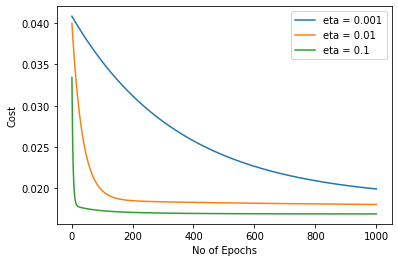

In [36]:
plt.figure()
for eta, error in train_cost_sgd.items():
    plt.plot(list(error.keys()), list(error.values()), label = f'eta = {eta}')
plt.xlabel('No of Epochs')
plt.ylabel('Cost')
plt.legend();

### Accuracy vs epochs plot

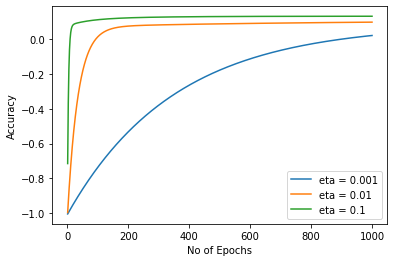

In [37]:
plt.figure()
for eta, accuracy in train_accuracy_sgd.items():
    plt.plot(list(accuracy.keys()), list(accuracy.values()), label = f'eta = {eta}')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')
plt.legend();

# Comparison between GD and SGD
## Cost comparison

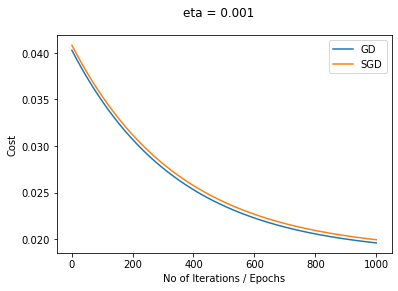

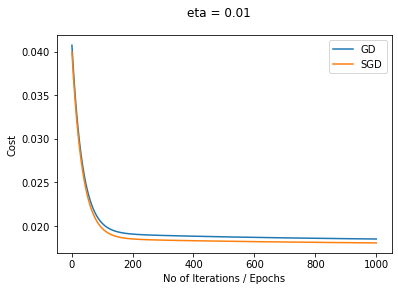

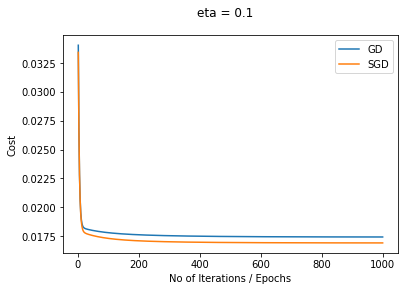

In [38]:
for eta in [0.001, 0.01, 0.1]:
    plt.figure().suptitle(f'eta = {eta}')
    plt.plot(list(train_cost_gd[eta].keys()), list(train_cost_gd[eta].values()), label = 'GD')
    plt.plot(list(train_cost_sgd[eta].keys()), list(train_cost_sgd[eta].values()), label = 'SGD')
    plt.xlabel('No of Iterations / Epochs')
    plt.ylabel('Cost')
    plt.legend();

## Accuracy comparison

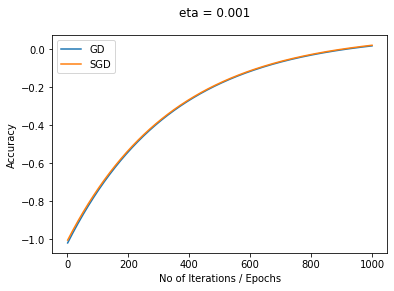

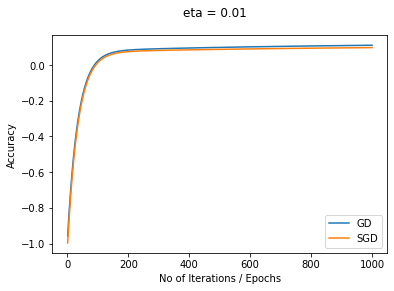

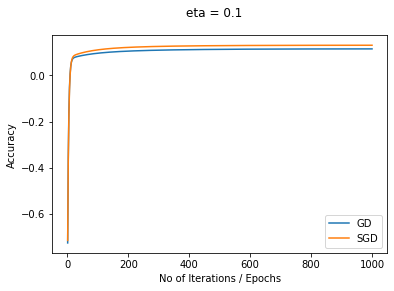

In [39]:
for eta in [0.001, 0.01, 0.1]:
    plt.figure().suptitle(f'eta = {eta}')
    plt.plot(list(train_accuracy_gd[eta].keys()), list(train_accuracy_gd[eta].values()), label = 'GD')
    plt.plot(list(train_accuracy_sgd[eta].keys()), list(train_accuracy_sgd[eta].values()), label = 'SGD')
    plt.xlabel('No of Iterations / Epochs')
    plt.ylabel('Accuracy')
    plt.legend();

# Predicting the output

In [43]:
# Getting input from user
age = float(input('Enter Age: '))
bmi = float(input('Enter BMI: '))
children = int(input('Enter no of children: '))

# Normalizing the input
age_normalized = normalize(age, 'age')
bmi_normalized = normalize(bmi, 'bmi')
children_normalized = normalize(children, 'children')

# Generating X vector
X = np.array([1, age_normalized, bmi_normalized, children_normalized])

# Calculating normalized result using normal equations weights
charge_normalized = predict(W_normal[best_normal_model], X)[0]

# Denormalizing the result
charge = denormalize(charge_normalized, 'charges')

# Printing the result
print(f'Predicted charge using normal equations is {charge}')

# Calculating normalized result using gradient descent weights
charge_normalized = predict(W_gd[best_eta_gd], X)[0]

# Denormalizing the result
charge = denormalize(charge_normalized, 'charges')

# Printing the result
print(f'Predicted charge using GD is {charge}')

# Calculating normalized result using normal equations weights
charge_normalized = predict(W_sgd[best_eta_sgd], X)[0]

# Denormalizing the result
charge = denormalize(charge_normalized, 'charges')

# Printing the result
print(f'Predicted charge using SGD is {charge}')

Enter Age: 28
Enter BMI: 33
Enter no of children: 3
Predicted charge using normal equations is 12642.159480199802
Predicted charge using GD is 13016.158481753959
Predicted charge using SGD is 10912.901652624161
